In [79]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

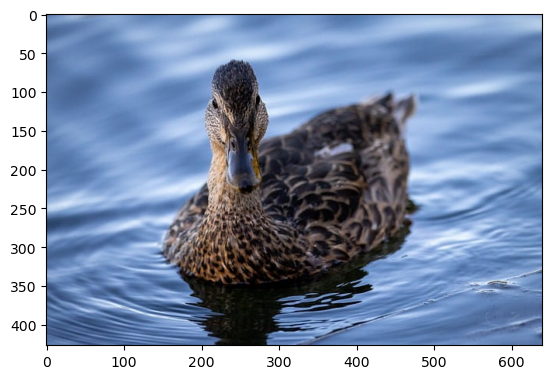

In [80]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [81]:
def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel

    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]

    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    def pad(im, kernel):
        pad_width = int((kernel.shape[0]-1)/2) #Calculating the needed padding assuming quadratic, odd numbered kernel
        padding = ((pad_width, pad_width),(pad_width, pad_width), (0,0)) #Specify padding for all dimensions of image
        im = np.pad(im, padding, mode='constant', constant_values=0) #Add padding
        return im

    #Padding image with 0 based on kernel size
    padded_im = pad(im, kernel)

    #Flipping kernel
    flipped_kernel = np.flip(np.flip(kernel, axis=0), axis=1)

    print(im.shape)
    print(padded_im.shape)
    print(kernel.shape)

    #Getting which indices to start looping from and to
    start_row = padded_im.shape[0]-im.shape[0]-1
    end_row = padded_im.shape[0]-start_row-1
    start_col = padded_im.shape[1]-im.shape[1]-1
    end_col = padded_im.shape[1]-start_col-1
    print(start_row)
    print(end_row)
    print(start_col)
    print(end_col)

    #Looping through image
    for channel in range(3):
        for i in range(start_row, end_row):
            for j in range(start_col, end_col):
                #Getting the portion of the padded image that is overlapped, NB! important to consider where to slice when middle is (i,j)
                overlap = padded_im[i-start_row:i-start_row+kernel.shape[0], j-start_col:j-start_col+kernel.shape[1], channel]

                #Put the sum of the multiplied and kernel together
                im[i-start_row][j-start_col][channel] = np.sum(overlap * flipped_kernel)

    assert len(im.shape) == 3

    return im

In [82]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

(427, 640, 3)
(431, 644, 3)
(5, 5)
2
429
2
642
3
427
3
640
(427, 640, 3)
(429, 642, 3)
(3, 3)
1
428
1
641
1
427
1
640


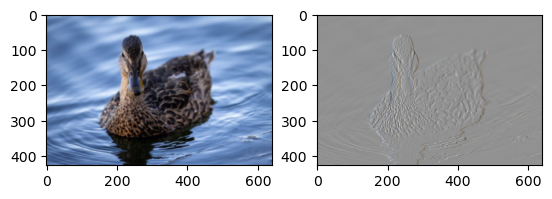

In [83]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()